In [1]:
# K-Means Clustering

import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.cluster import KMeans

%precision 3

'%.3f'

In [2]:
billboard_data = pd.read_csv('data/input_kmc.csv')
billboard_data.head()

/Users/kei/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,billboard_id,name,directionId,directionName,lat,lng,googlePlacesId,typeId,typeName,...,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831
0,22,90b91c6b8e1d3160c023b6a074133cad,I-215 and Valley View 2,10,East,36.0677,-115.192320,"Las Vegas, NV",75.0,Bulletin,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
1,65241,90b91c6b8e1d3160c023b6a074133cad,I-215 NL East Of Decatur/I-15 Interchange Faci...,10,East,36.0677,-115.192320,"Las Vegas, NV",75.0,Bulletin,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
2,25,9ffd87ae6a0f9bb07c378aafdc32f76c,I-15 and South Point,11,South,36.0072,-115.179675,"Las Vegas, NV",75.0,Bulletin,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
3,68676,9ffd87ae6a0f9bb07c378aafdc32f76c,I5 El @ South Point Facing South,11,South,36.0072,-115.179675,"Las Vegas, NV",75.0,Bulletin,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
4,33,62c1d28c8711c2d8ec5635b0e5ca4210,I-215 and Eastern,12,West,36.0221,-115.118250,"Las Vegas, NV",75.0,Bulletin,...,31.0,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0


In [3]:
billboard_data.columns

Index(['id', 'billboard_id', 'name', 'directionId', 'directionName', 'lat',
       'lng', 'googlePlacesId', 'typeId', 'typeName',
       ...
       'a822', 'a823', 'a824', 'a825', 'a826', 'a827', 'a828', 'a829', 'a830',
       'a831'],
      dtype='object', length=841)

In [4]:
billboard_data.shape

(118013, 841)

In [5]:
billboard_data.dtypes

id                  int64
billboard_id       object
name               object
directionId        object
directionName      object
lat                object
lng               float64
googlePlacesId     object
typeId            float64
typeName           object
a1                float64
a2                float64
a3                float64
a4                float64
a5                float64
a6                float64
a7                float64
a8                float64
a9                float64
a10               float64
a11               float64
a12               float64
a13               float64
a14               float64
a15               float64
a16               float64
a17               float64
a18               float64
a19               float64
a20               float64
                   ...   
a802              float64
a803              float64
a804              float64
a805              float64
a806              float64
a807              float64
a808              float64
a809        

In [6]:
s = billboard_data[billboard_data['lat'] == 'Bar/Restaurant Jukebox']
s

,id,billboard_id,name,directionId,directionName,lat,lng,googlePlacesId,typeId,typeName,...,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831
54025,56760,d969a17dfbf28195ee609edf3934c59c,"MAC DADDY\"",0,NULL,47.76793000,-117.41997000,S...","WA""",164,Bar/Restaurant Jukebox,NaN,NaN,NaN,NaN,...,2.0,105.0,15.0,82.0,41.0,62.0,80.0,6.0,37.0,211.0


In [7]:
billboard_data = billboard_data.drop(billboard_data.index[[54025]])
billboard_data.shape

(118012, 841)

In [8]:
# Change types. 
# billboard_data[['lat','lng','typeId']] = billboard_data[['lat','lng','typeId']].astype(str)
billboard_data[['lat']] = billboard_data[['lat']].astype(float)
billboard_data[['typeId']] = billboard_data[['typeId']].astype(str)
billboard_data.dtypes

id                  int64
billboard_id       object
name               object
directionId        object
directionName      object
lat               float64
lng               float64
googlePlacesId     object
typeId             object
typeName           object
a1                float64
a2                float64
a3                float64
a4                float64
a5                float64
a6                float64
a7                float64
a8                float64
a9                float64
a10               float64
a11               float64
a12               float64
a13               float64
a14               float64
a15               float64
a16               float64
a17               float64
a18               float64
a19               float64
a20               float64
                   ...   
a802              float64
a803              float64
a804              float64
a805              float64
a806              float64
a807              float64
a808              float64
a809        

In [9]:
# Remove some columns. 
billboard_data_loc_sub = billboard_data[['billboard_id','lat','lng','typeId']]
print(billboard_data_loc_sub)
billboard_data_aud_sub = billboard_data.iloc[:,10:]
print(billboard_data_aud_sub)

                            billboard_id        lat         lng typeId
0       90b91c6b8e1d3160c023b6a074133cad  36.067700 -115.192320   75.0
1       90b91c6b8e1d3160c023b6a074133cad  36.067700 -115.192320   75.0
2       9ffd87ae6a0f9bb07c378aafdc32f76c  36.007155 -115.179675   75.0
3       9ffd87ae6a0f9bb07c378aafdc32f76c  36.007155 -115.179675   75.0
4       62c1d28c8711c2d8ec5635b0e5ca4210  36.022130 -115.118250   75.0
5       62c1d28c8711c2d8ec5635b0e5ca4210  36.022130 -115.118250   75.0
6       194035be72147c157e4b2e063d732973  36.176550 -115.166915   75.0
7       194035be72147c157e4b2e063d732973  36.176550 -115.166915   75.0
8       47b4043f6e4a38e33d35b97f1cd9d062  36.123250 -115.181310   75.0
9       47b4043f6e4a38e33d35b97f1cd9d062  36.123250 -115.181310   75.0
10      621a20e2be3b7d3255e97df8e7ddc4b6  36.174735 -115.223350   75.0
11      621a20e2be3b7d3255e97df8e7ddc4b6  36.174735 -115.223350   75.0
12      3444c19f9412fe71a1654c07a8d3432a  36.079890 -115.042555   75.0
13    

In [10]:
# Concatenate those sub data. 
training_data = pd.concat([billboard_data_loc_sub, billboard_data_aud_sub], axis=1)
training_data.head()

,billboard_id,lat,lng,typeId,a1,a2,a3,a4,a5,a6,...,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831
0,90b91c6b8e1d3160c023b6a074133cad,36.067700,-115.192320,75.0,33.0,25.0,87.0,33.0,30.0,87.0,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
1,90b91c6b8e1d3160c023b6a074133cad,36.067700,-115.192320,75.0,33.0,25.0,87.0,33.0,30.0,87.0,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
2,9ffd87ae6a0f9bb07c378aafdc32f76c,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
3,9ffd87ae6a0f9bb07c378aafdc32f76c,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
4,62c1d28c8711c2d8ec5635b0e5ca4210,36.022130,-115.118250,75.0,45.0,65.0,118.0,44.0,39.0,56.0,...,31.0,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0


In [11]:
#  Remove some rows where typeId is equal to 0.0 or nan. 

typeId_count = training_data['typeId'].value_counts()
typeId_count

164.0    48438
171.0    25207
188.0     8492
75.0      7585
177.0     7517
184.0     4316
165.0     3404
181.0     1740
190.0     1456
0.0       1336
48.0      1189
189.0     1165
166.0     1020
94.0       979
172.0      930
168.0      612
169.0      548
180.0      455
173.0      279
109.0      266
182.0      249
187.0      228
175.0      192
131.0      108
178.0       78
174.0       73
179.0       44
170.0       29
163.0       19
66.0        13
167.0       11
16.0        11
2.0         10
151.0        6
99.0         2
176.0        2
105.0        2
185.0        1
Name: typeId, dtype: int64

In [12]:
training_data = training_data[training_data['typeId'] != '0.0']
training_data.shape

(116676, 835)

In [13]:
training_data = training_data[training_data['typeId'] != 'nan']
training_data.shape

(116676, 835)

In [14]:
# training_data = training_data.dropna()
# training_data.shape

In [15]:
training_data = training_data.fillna(0)
training_data.shape

(116676, 835)

In [16]:
training_data.head()

,billboard_id,lat,lng,typeId,a1,a2,a3,a4,a5,a6,...,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831
0,90b91c6b8e1d3160c023b6a074133cad,36.067700,-115.192320,75.0,33.0,25.0,87.0,33.0,30.0,87.0,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
1,90b91c6b8e1d3160c023b6a074133cad,36.067700,-115.192320,75.0,33.0,25.0,87.0,33.0,30.0,87.0,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
2,9ffd87ae6a0f9bb07c378aafdc32f76c,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
3,9ffd87ae6a0f9bb07c378aafdc32f76c,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
4,62c1d28c8711c2d8ec5635b0e5ca4210,36.022130,-115.118250,75.0,45.0,65.0,118.0,44.0,39.0,56.0,...,31.0,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0


In [17]:
# training_data.isnull().any()

In [18]:
# training_data.isnull().sum()

In [19]:
training_data = training_data.fillna(0)
training_data.isnull().sum()

billboard_id    0
lat             0
lng             0
typeId          0
a1              0
a2              0
a3              0
a4              0
a5              0
a6              0
a7              0
a8              0
a9              0
a10             0
a11             0
a12             0
a13             0
a14             0
a15             0
a16             0
a17             0
a18             0
a19             0
a20             0
a21             0
a22             0
a23             0
a24             0
a25             0
a26             0
               ..
a802            0
a803            0
a804            0
a805            0
a806            0
a807            0
a808            0
a809            0
a810            0
a811            0
a812            0
a813            0
a814            0
a815            0
a816            0
a817            0
a818            0
a819            0
a820            0
a821            0
a822            0
a823            0
a824            0
a825            0
a826      

In [20]:
training_data_iddropped = training_data.drop('billboard_id', axis=1)
training_data_iddropped.head()

,lat,lng,typeId,a1,a2,a3,a4,a5,a6,a7,...,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831
0,36.067700,-115.192320,75.0,33.0,25.0,87.0,33.0,30.0,87.0,65.0,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
1,36.067700,-115.192320,75.0,33.0,25.0,87.0,33.0,30.0,87.0,65.0,...,51.0,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0
2,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,115.0,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
3,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,115.0,...,48.0,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0
4,36.022130,-115.118250,75.0,45.0,65.0,118.0,44.0,39.0,56.0,81.0,...,31.0,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0


In [21]:
# Standardization

In [22]:
# Elbow curve to find the best number of clusters. Takes about 15 minutes. 

# training_data_iddropped = training_data.drop('id', axis=1)

# cost_list = []
# for i in range(1, 10): 
#     kmeans = KMeans(n_clusters=i, init='random', random_state=0)
#     kmeans.fit(training_data_iddropped)
#     cost_list.append(kmeans.inertia_)

# plt.plot(range(1,10), cost_list, marker='+')
# plt.xlabel('Number of clusters')
# plt.ylabel('Cost')

In [23]:
# Learn the data. 
kmeans = KMeans(n_clusters=5)
kmeans.fit(training_data_iddropped)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
# Concatenate billboards and predicted clusters.  

cluster_predicted = kmeans.predict(training_data_iddropped)
# cluster_predicted = kmeans.predict(training_data_std)

training_data_iddropped['cluster'] = cluster_predicted
training_data_iddropped.head()

,lat,lng,typeId,a1,a2,a3,a4,a5,a6,a7,...,a823,a824,a825,a826,a827,a828,a829,a830,a831,cluster
0,36.067700,-115.192320,75.0,33.0,25.0,87.0,33.0,30.0,87.0,65.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,3
1,36.067700,-115.192320,75.0,33.0,25.0,87.0,33.0,30.0,87.0,65.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,3
2,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,115.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,3
3,36.007155,-115.179675,75.0,79.0,33.0,125.0,69.0,73.0,195.0,115.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,3
4,36.022130,-115.118250,75.0,45.0,65.0,118.0,44.0,39.0,56.0,81.0,...,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0,3


In [25]:
# Add 'billboard_id' column. 
billboard_with_cluster = pd.concat([training_data['billboard_id'], training_data_iddropped], axis=1)
# Convert type decimal number string to int in 'typeId'. ("75.0" => 75)
billboard_with_cluster['typeId'] = billboard_with_cluster['typeId'].astype(float)
billboard_with_cluster['typeId'] = billboard_with_cluster['typeId'].astype(np.int64)
billboard_with_cluster.head(100)

,billboard_id,lat,lng,typeId,a1,a2,a3,a4,a5,a6,...,a823,a824,a825,a826,a827,a828,a829,a830,a831,cluster
0,90b91c6b8e1d3160c023b6a074133cad,36.067700,-115.192320,75,33.0,25.0,87.0,33.0,30.0,87.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,3
1,90b91c6b8e1d3160c023b6a074133cad,36.067700,-115.192320,75,33.0,25.0,87.0,33.0,30.0,87.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,3
2,9ffd87ae6a0f9bb07c378aafdc32f76c,36.007155,-115.179675,75,79.0,33.0,125.0,69.0,73.0,195.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,3
3,9ffd87ae6a0f9bb07c378aafdc32f76c,36.007155,-115.179675,75,79.0,33.0,125.0,69.0,73.0,195.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,3
4,62c1d28c8711c2d8ec5635b0e5ca4210,36.022130,-115.118250,75,45.0,65.0,118.0,44.0,39.0,56.0,...,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0,3
5,62c1d28c8711c2d8ec5635b0e5ca4210,36.022130,-115.118250,75,45.0,65.0,118.0,44.0,39.0,56.0,...,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0,3
6,194035be72147c157e4b2e063d732973,36.176550,-115.166915,75,86.0,35.0,139.0,79.0,67.0,224.0,...,588.0,845.0,2710.0,1183.0,693.0,2826.0,243.0,3147.0,1011.0,3
7,194035be72147c157e4b2e063d732973,36.176550,-115.166915,75,86.0,35.0,139.0,79.0,67.0,224.0,...,588.0,845.0,2710.0,1183.0,693.0,2826.0,243.0,3147.0,1011.0,3
8,47b4043f6e4a38e33d35b97f1cd9d062,36.123250,-115.181310,75,139.0,64.0,201.0,110.0,107.0,271.0,...,1102.0,2118.0,6034.0,2663.0,1824.0,6387.0,481.0,7002.0,2249.0,0
9,47b4043f6e4a38e33d35b97f1cd9d062,36.123250,-115.181310,75,139.0,64.0,201.0,110.0,107.0,271.0,...,1102.0,2118.0,6034.0,2663.0,1824.0,6387.0,481.0,7002.0,2249.0,0


In [26]:
billboard_with_cluster.shape

(116676, 836)

In [27]:
# billboard_with_cluster.to_csv('data/billboard_with_cluster.csv')

In [44]:
billboard_with_cluster_only = pd.concat([training_data['billboard_id'], training_data_iddropped['cluster']], axis=1)
# billboard_with_cluster_only.to_csv('data/billboard_with_cluster_only.csv')
billboard_with_cluster_only.head()

,billboard_id,cluster
0,90b91c6b8e1d3160c023b6a074133cad,3
1,90b91c6b8e1d3160c023b6a074133cad,3
2,9ffd87ae6a0f9bb07c378aafdc32f76c,3
3,9ffd87ae6a0f9bb07c378aafdc32f76c,3
4,62c1d28c8711c2d8ec5635b0e5ca4210,3


0     1377
1    92159
2       50
3     5169
4    17921
Name: cluster, dtype: int64


Text(0, 0.5, 'num of billboards')

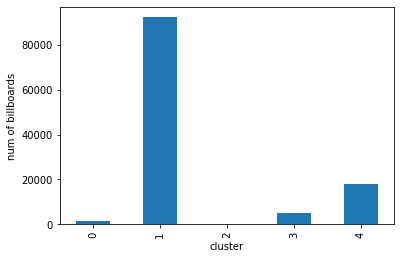

In [28]:
# Explore the clustered data. 

# Count the number of memebers in each cluster. 
labels = pd.Series(kmeans.labels_, name='cluster')
print(labels.value_counts(sort=False))

ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster')
ax.set_ylabel('num of billboards')

In [29]:
cross_cluster_typeId = billboard_with_cluster.groupby(['cluster','typeId']).size()
cross_cluster_typeId

cluster  typeId
0        75         109
         109          1
         163          1
         164         52
         165         51
         166         97
         167          2
         168         15
         169          4
         171         56
         172          4
         175         29
         177         12
         179          2
         180          9
         181        597
         182         77
         184         81
         188         15
         189          1
         190        162
1        2           10
         16           6
         48        1034
         66           1
         75        3128
         94         342
         105          1
         109        105
         131         36
                   ... 
4        94         345
         99           2
         105          1
         109        118
         131         63
         151          1
         163          5
         164       3530
         165        920
         166        348


In [30]:
cross_cluster_typeId = cross_cluster_typeId.unstack().fillna(0)
cross_cluster_typeId

typeId,2,16,48,66,75,94,99,105,109,131,...,179,180,181,182,184,185,187,188,189,190
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,109.0,0.0,0.0,0.0,1.0,0.0,...,2.0,9.0,597.0,77.0,81.0,0.0,0.0,15.0,1.0,162.0
1,10.0,6.0,1034.0,1.0,3128.0,342.0,0.0,1.0,105.0,36.0,...,23.0,256.0,90.0,2.0,2315.0,1.0,228.0,6156.0,1058.0,438.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,0.0,25.0
3,0.0,0.0,20.0,3.0,1265.0,292.0,0.0,0.0,42.0,9.0,...,1.0,40.0,807.0,132.0,416.0,0.0,0.0,147.0,7.0,342.0
4,0.0,5.0,135.0,9.0,3083.0,345.0,2.0,1.0,118.0,63.0,...,17.0,150.0,246.0,38.0,1502.0,0.0,0.0,2169.0,99.0,489.0


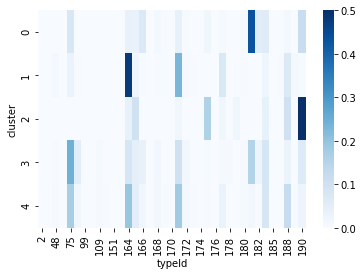

In [31]:
sns.heatmap(cross_cluster_typeId.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [32]:
# typeId
billboard_type = pd.read_csv('data/billboards_20191112.csv')
billboard_type.head()

/Users/kei/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,locationHash,name,directionId,directionName,lat,lng,googlePlacesId,typeId,typeName
0,20,fe707bdee17281102dc95c9033379149,I-215 and Durango,7,North,36.06556000,-115.272515,"Las Vegas, NV",75.0,Bulletin
1,21,203f5b73a45813bcd385e4bf647395b8,I-215 and Jones,10,East,36.06669000,-115.215070,"Las Vegas, NV",75.0,Bulletin
2,22,90b91c6b8e1d3160c023b6a074133cad,I-215 and Valley View 2,10,East,36.06770000,-115.192320,"Las Vegas, NV",75.0,Bulletin
3,23,68bac0690e1090a12ba0d398d083d3b4,I-15 and Warm Springs,11,South,36.05768500,-115.179950,"Enterprise, NV",75.0,Bulletin
4,24,25c0366830f49de9358d96a00378a3ee,I-15 and St. Rose Pkwy,12,West,35.97996000,-115.180570,"Las Vegas, NV",75.0,Bulletin


In [33]:
# Clean up. 
billboard_type = billboard_type[billboard_type['typeId'] != '0.0']
billboard_type = billboard_type[billboard_type['typeId'] != 'nan']
billboard_type['typeId'] = billboard_type['typeId'].astype(float)
billboard_type = billboard_type.fillna(0)
billboard_type['typeId'] = billboard_type['typeId'].astype(np.int64)
billboard_type = billboard_type.drop(billboard_type.index[billboard_type['typeId'] == 0])
billboard_type.groupby(['typeId','typeName'])[['typeId','typeName']].size()

/Users/kei/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


typeId  typeName                   
2       Advertisers                       10
16      Mobile Billboard                  22
48      Poster                          1198
66      Spectacular                       13
75      Bulletin                        8318
94      Taxi Exterior                   1069
99      Bus Interior                      12
105     0                                  6
109     Transit Shelter                  346
131     Urban Panel                      240
151     0                                214
163     Alcohol Store                     28
164     Bar/Restaurant Jukebox         48543
165     Bar/Restaurant TV               3655
166     Cinema Lobby                    1032
167     Coffee Shop                       11
168     College Campus                   916
169     Dental Clinic                    556
170     DMV                               29
171     Doctors Office Waiting Room    25460
172     EV Kiosk                        1004
173     Grocery Che

In [34]:
# Score each cluster based on the median count for given aud. 

billboard_with_cluster.shape

(116676, 836)

In [35]:
aud_with_cluster_sub = billboard_with_cluster.drop(['billboard_id','lat','lng','typeId'], axis=1)
aud_with_cluster_sub.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a823,a824,a825,a826,a827,a828,a829,a830,a831,cluster
0,33.0,25.0,87.0,33.0,30.0,87.0,65.0,33.0,27.0,20.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,3
1,33.0,25.0,87.0,33.0,30.0,87.0,65.0,33.0,27.0,20.0,...,576.0,1264.0,2644.0,1465.0,424.0,2427.0,174.0,2752.0,825.0,3
2,79.0,33.0,125.0,69.0,73.0,195.0,115.0,67.0,62.0,67.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,3
3,79.0,33.0,125.0,69.0,73.0,195.0,115.0,67.0,62.0,67.0,...,670.0,1020.0,3100.0,1396.0,1162.0,3125.0,281.0,3434.0,1878.0,3
4,45.0,65.0,118.0,44.0,39.0,56.0,81.0,43.0,27.0,34.0,...,695.0,1036.0,2285.0,1231.0,336.0,1977.0,114.0,2299.0,875.0,3


In [36]:
median_for_each_aud_and_cluster = aud_with_cluster_sub.groupby('cluster').median()
median_for_each_aud_and_cluster.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831
cluster,,,,,,,,,,,,,,,,,,,,,
0,334.0,163.0,551.0,263.0,266.0,743.0,491.0,257.0,204.0,250.0,...,183.0,2159.0,1594.0,4827.0,2172.0,2055.0,4835.0,845.0,3948.0,5488.0
1,10.0,4.0,17.0,7.0,7.0,24.0,14.0,7.0,5.0,7.0,...,1.0,17.0,8.0,52.0,21.0,45.0,61.0,6.0,43.0,61.0
2,1159.0,557.5,1673.0,967.5,904.0,2212.5,1783.5,936.5,657.5,754.0,...,10193.0,26093.0,7839.0,31975.5,10777.0,9324.0,34596.0,10149.5,29585.0,38956.0
3,136.0,63.0,234.0,111.0,113.0,313.0,206.0,106.0,75.0,106.0,...,49.0,578.0,591.0,1947.0,874.0,1049.0,2016.0,287.0,1569.0,1773.0
4,53.0,24.0,90.0,43.0,44.0,131.0,81.0,42.0,29.0,41.0,...,14.0,187.0,148.0,556.0,257.0,325.0,592.0,77.0,447.0,570.0


In [37]:
max_s = median_for_each_aud_and_cluster.max(axis=1)
print( type(max_s))
print(max_s)
max_a = np.array(max_s)
max_a

<class 'pandas.core.series.Series'>
cluster
0     35334.0
1       866.0
2    125345.0
3     16898.0
4      5728.0
dtype: float64


array([ 35334.,    866., 125345.,  16898.,   5728.])

In [38]:
normalized_score = median_for_each_aud_and_cluster.divide(max_a, axis=0)
print(type(normalized_score))
normalized_score

<class 'pandas.core.frame.DataFrame'>


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.009453,0.004613,0.015594,0.007443,0.007528,0.021028,0.013896,0.007273,0.005773,0.007075,...,0.005179,0.061103,0.045112,0.136611,0.061471,0.058159,0.136837,0.023915,0.111734,0.155318
1,0.011547,0.004619,0.019630,0.008083,0.008083,0.027714,0.016166,0.008083,0.005774,0.008083,...,0.001155,0.019630,0.009238,0.060046,0.024249,0.051963,0.070439,0.006928,0.049654,0.070439
2,0.009246,0.004448,0.013347,0.007719,0.007212,0.017651,0.014229,0.007471,0.005246,0.006015,...,0.081320,0.208169,0.062539,0.255100,0.085979,0.074387,0.276006,0.080973,0.236029,0.310790
3,0.008048,0.003728,0.013848,0.006569,0.006687,0.018523,0.012191,0.006273,0.004438,0.006273,...,0.002900,0.034205,0.034975,0.115221,0.051722,0.062078,0.119304,0.016984,0.092851,0.104924
4,0.009253,0.004190,0.015712,0.007507,0.007682,0.022870,0.014141,0.007332,0.005063,0.007158,...,0.002444,0.032647,0.025838,0.097067,0.044867,0.056739,0.103352,0.013443,0.078038,0.099511


In [43]:
normalized_score.to_csv('data/norm_scores_for_each_cluster.csv')

In [39]:
# Example

audience_ids = ['a44', 'a61', 'a748']
billboard_id = '05cc093be9bc7d7a4c491972e235231b'

# Get the cluster that the billboard belongs to. 
cluster = billboard_with_cluster[billboard_with_cluster['billboard_id'] == billboard_id]['cluster'].values[0]
cluster

3

In [40]:
# Get the average of the normalized scores. 
score4 = 0.0
for aud_id in audience_ids:
    score = normalized_score.loc[cluster, aud_id]
    print('score:', score)
    score4 += score
    
score4 = score4 / len(audience_ids)
score4

score: 0.5216001893715233
score: 0.8817611551662918
score: 0.01278257781986034


0.4720479741192251

In [41]:
normalized_score.loc[1, 'a44']

0.5300230946882217

In [42]:
normalized_score.loc[1, 'a1']

0.011547344110854504